In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold

/home/kumar/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
data = pd.read_csv("santander-train.csv",nrows=20000)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
target = 'TARGET'
X = data.drop('TARGET', axis=1)
y = data[target]
X.shape, y.shape

((20000, 370), (20000,))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

# Constant Features Removal

In [6]:
constantFilter = VarianceThreshold(threshold=0)
constantFilter.fit(X_train)

VarianceThreshold(threshold=0)

In [7]:
X_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
8579,17282,2,24,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63200.700000
19085,38270,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88640.610000
15698,31526,2,45,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96314.160000
19307,38737,2,29,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117568.020000
8165,16469,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [8]:
constantFilter.get_support().sum()

291

In [9]:
constantList = [not temp for temp in constantFilter.get_support()]

In [10]:
len(X_train.columns[constantList])

79

In [11]:
columnsToRemove = X_train.columns[constantList]   # In Index form
columnsToRemove = list(columnsToRemove)     # In List form
type(columnsToRemove)                             # columns in array form

list

In [12]:
X_train.shape, X_test.shape

((16000, 370), (4000, 370))

In [13]:
X_train_filter = X_train.drop(columnsToRemove, axis=1)
X_test_filter = X_test.drop(columnsToRemove,axis=1)

In [14]:
X_train_filter.shape, X_test_filter.shape

((16000, 291), (4000, 291))

In [15]:
# X_train_filter = constantFilter.transform(X_train)
# X_test_filter = constantFilter.transform(X_test)


# Quasi Constant Feature reduction

In [16]:
quasiConstantFilter = VarianceThreshold(threshold=0.01)

In [17]:
quasiConstantFilter.fit(X_train_filter)

VarianceThreshold(threshold=0.01)

In [18]:
quasiConstantFilter.get_support().sum()

245

In [19]:
removeList = [not temp for temp in quasiConstantFilter.get_support()]
columnsToRemove = list(X_train_filter.columns[removeList])
X_train_quasi = X_train_filter.drop(columnsToRemove, axis=1)
X_test_quasi = X_test_filter.drop(columnsToRemove, axis=1)


In [20]:
# XtrainQuasiFilter = quasiConstantFilter.transform(XtrainFilter)
# XtestQuasiFilter = quasiConstantFilter.transform(XtestFilter)

In [21]:
X_train_quasi.shape, X_test_quasi.shape, X_train.shape

((16000, 245), (4000, 245), (16000, 370))

In [22]:
X_train_filter.duplicated().sum()

0

## Duplicate Removal

In [23]:
X_train_T = X_train_quasi.T
X_test_T = X_test_quasi.T
X_train_T.shape, X_test_T.shape

((245, 16000), (245, 4000))

In [24]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)
X_train_T.head()

,8579,19085,15698,19307,8165,2222,161,11419,6080,5957,...,15694,670,18469,9853,5378,19117,13166,1024,8605,12669
ID,17282.0,38270.0,31526.0,38737.0,16469.0,4464.0,302.00,22890.00,12211.0,11949.0,...,31516.0,1337.0,37006.0,19809.0,10783.00,38333.0,26389.0,2025.0,17327.0,25406.0
var3,2.0,2.0,2.0,2.0,2.0,2.0,2.00,2.00,2.0,2.0,...,2.0,2.0,2.0,2.0,2.00,2.0,2.0,2.0,2.0,2.0
var15,24.0,23.0,45.0,29.0,23.0,23.0,31.00,31.00,24.0,28.0,...,26.0,36.0,23.0,44.0,23.00,25.0,34.0,43.0,23.0,23.0
imp_ent_var16_ult1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
imp_op_var39_comer_ult1,0.0,0.0,0.0,0.0,0.0,0.0,97.59,1005.54,0.0,0.0,...,0.0,0.0,0.0,0.0,53.85,0.0,0.0,0.0,0.0,0.0


In [25]:
X_train_T.duplicated().sum()

18

In [26]:
duplicated_features = X_train_T.duplicated()
duplicated_features

ID                               False
var3                             False
var15                            False
imp_ent_var16_ult1               False
imp_op_var39_comer_ult1          False
imp_op_var39_comer_ult3          False
imp_op_var40_comer_ult1          False
imp_op_var40_comer_ult3          False
imp_op_var40_efect_ult1          False
imp_op_var40_efect_ult3          False
imp_op_var40_ult1                False
imp_op_var41_comer_ult1          False
imp_op_var41_comer_ult3          False
imp_op_var41_efect_ult1          False
imp_op_var41_efect_ult3          False
imp_op_var41_ult1                False
imp_op_var39_efect_ult1          False
imp_op_var39_efect_ult3          False
imp_op_var39_ult1                False
imp_sal_var16_ult1               False
ind_var1_0                       False
ind_var5_0                       False
ind_var5                         False
ind_var8_0                       False
ind_var8                         False
ind_var12_0              

In [27]:
feature_to_keep = [not index for index in duplicated_features]
feature_to_keep

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 Fals

In [28]:
X_train_unique = X_train_T[feature_to_keep].T
X_test_unique = X_test_T[feature_to_keep].T
X_train_unique.shape, X_test_unique.shape

((16000, 227), (4000, 227))

## Build ML model and compair the performance 

In [29]:
def run_randomforest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy on test set :")
    print(accuracy_score(y_test, y_pred))
    


In [30]:
%%time
run_randomforest(X_train_unique, X_test_unique, y_train, y_test)

Accuracy on test set :
0.95875
CPU times: user 5.61 s, sys: 56.7 ms, total: 5.67 s
Wall time: 1.85 s


In [31]:
%%time
run_randomforest(X_train, X_test, y_train, y_test)

Accuracy on test set :
0.9585
CPU times: user 6.71 s, sys: 133 ms, total: 6.84 s
Wall time: 2.47 s


## Remove Correlated Features

In [32]:
corrmat = X_train_unique.corr()
corrmat.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
ID,1.000000,-0.025277,-0.001942,0.003594,0.004054,-0.001697,-0.015882,-0.019807,0.000956,-0.000588,...,-0.001337,0.002051,-0.008500,0.006554,0.005907,0.008825,-0.009174,0.012031,0.012128,0.006612
var3,-0.025277,1.000000,-0.007647,0.001819,0.008981,0.009232,0.001638,0.001746,0.000614,0.000695,...,0.000544,0.000586,0.000337,0.000550,0.000563,0.000922,0.000598,0.000875,0.000942,0.000415
var15,-0.001942,-0.007647,1.000000,0.030919,0.106245,0.109140,0.048524,0.055708,0.004040,0.005796,...,0.025522,0.020168,0.011550,0.019325,0.019527,0.041321,0.016172,0.043577,0.044281,-0.000810
imp_ent_var16_ult1,0.003594,0.001819,0.030919,1.000000,0.029418,0.024905,0.014513,0.013857,-0.000613,-0.000691,...,0.014032,-0.000583,-0.000337,-0.000548,-0.000561,0.000541,-0.000577,0.000231,0.000235,0.000966
imp_op_var39_comer_ult1,0.004054,0.008981,0.106245,0.029418,1.000000,0.888789,0.381632,0.341266,0.012927,0.019674,...,0.002328,0.016743,-0.001662,0.020509,0.021276,-0.001905,-0.000635,-0.002552,-0.002736,0.003656


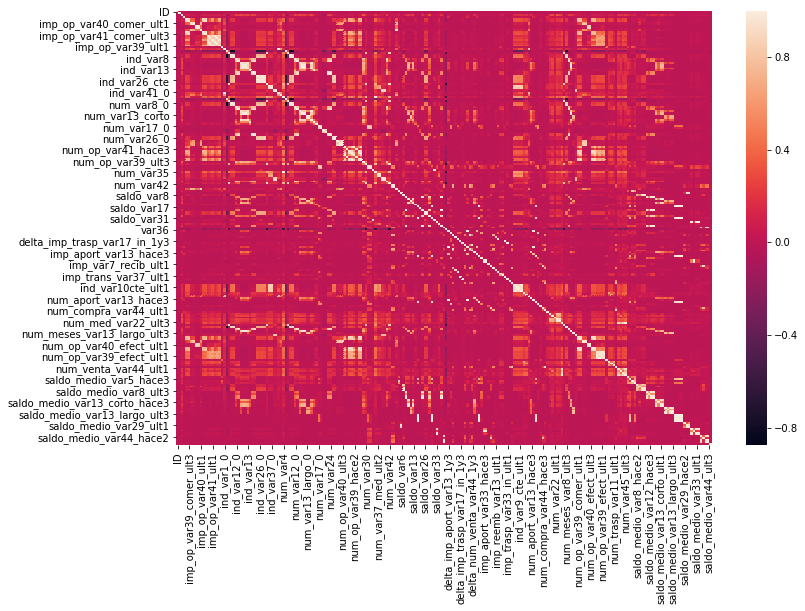

In [33]:
plt.figure(figsize=(12,8))
sns.heatmap(corrmat)

In [34]:
def get_correlation(data, threshold):
    corr_col = set()
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j]) > threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
                
    return corr_col

In [35]:
corr_features = get_correlation(X_train_unique, .85)
corr_features

{'delta_num_aport_var13_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_venta_var44_1y3',
 'imp_aport_var17_hace3',
 'imp_aport_var33_ult1',
 'imp_op_var39_comer_ult3',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_op_var40_comer_ult3',
 'imp_op_var40_efect_ult3',
 'imp_op_var41_comer_ult1',
 'imp_op_var41_comer_ult3',
 'imp_op_var41_efect_ult3',
 'imp_op_var41_ult1',
 'imp_reemb_var13_ult1',
 'imp_reemb_var17_ult1',
 'imp_trasp_var17_in_ult1',
 'imp_trasp_var33_in_ult1',
 'ind_var10_ult1',
 'ind_var10cte_ult1',
 'ind_var13',
 'ind_var13_corto',
 'ind_var13_corto_0',
 'ind_var24',
 'ind_var24_0',
 'ind_var25_0',
 'ind_var26_0',
 'ind_var26_cte',
 'ind_var37_0',
 'ind_var41_0',
 'ind_var8',
 'ind_var8_0',
 'ind_var9_cte_ult1',
 'ind_var9_ult1',
 'num_aport_var13_ult1',
 'num_aport_var17_hace3',
 'num_compra_var44_hace3',
 'num_med_var22_ult3',
 'num_meses_var12_ult3',
 'num_meses_var13_corto_ult3',
 'num_meses_var5_ult3',
 'num_meses_var8_ult3',
 '

In [36]:
len(corr_features)

124

In [37]:
X_train_uncorr = X_train_unique.drop(labels=corr_features, axis = 1)
X_test_uncorr = X_test_unique.drop(labels=corr_features, axis=1)

In [38]:
%%time
run_randomforest(X_train_uncorr, X_test_uncorr, y_train, y_test)

Accuracy on test set :
0.95875
CPU times: user 3.92 s, sys: 27.5 ms, total: 3.95 s
Wall time: 1.49 s


## Feature Grouping and Feature Importance

In [39]:
corrdata = corrmat.abs().stack()
corrdata

ID     ID                               1.000000
       var3                             0.025277
       var15                            0.001942
       imp_ent_var16_ult1               0.003594
       imp_op_var39_comer_ult1          0.004054
       imp_op_var39_comer_ult3          0.001697
       imp_op_var40_comer_ult1          0.015882
       imp_op_var40_comer_ult3          0.019807
       imp_op_var40_efect_ult1          0.000956
       imp_op_var40_efect_ult3          0.000588
       imp_op_var40_ult1                0.012443
       imp_op_var41_comer_ult1          0.010319
       imp_op_var41_comer_ult3          0.005268
       imp_op_var41_efect_ult1          0.017605
       imp_op_var41_efect_ult3          0.016960
       imp_op_var41_ult1                0.018040
       imp_op_var39_efect_ult1          0.017400
       imp_op_var39_efect_ult3          0.016745
       imp_op_var39_ult1                0.015206
       imp_sal_var16_ult1               0.000103
       ind_var1_0   

In [40]:
corrdata = corrdata.sort_values(ascending=False)
corrdata

ind_var13_corto               num_var13_corto                 1.000000e+00
num_var13_corto               ind_var13_corto                 1.000000e+00
delta_imp_trasp_var33_in_1y3  imp_trasp_var33_in_ult1         1.000000e+00
imp_trasp_var33_in_ult1       delta_imp_trasp_var33_in_1y3    1.000000e+00
num_meses_var5_ult3           num_meses_var5_ult3             1.000000e+00
num_med_var45_ult3            num_med_var45_ult3              1.000000e+00
imp_venta_var44_hace3         imp_venta_var44_hace3           1.000000e+00
imp_venta_var44_ult1          imp_venta_var44_ult1            1.000000e+00
ind_var10_ult1                ind_var10_ult1                  1.000000e+00
ind_var10cte_ult1             ind_var10cte_ult1               1.000000e+00
ind_var9_cte_ult1             ind_var9_cte_ult1               1.000000e+00
ind_var9_ult1                 ind_var9_ult1                   1.000000e+00
ind_var43_emit_ult1           ind_var43_emit_ult1             1.000000e+00
ind_var43_recib_ult1     

In [41]:
corrdata = corrdata[corrdata > 0.85]
corrdata = corrdata[corrdata < 1]
corrdata

delta_num_venta_var44_1y3     delta_imp_venta_var44_1y3       1.000000
delta_imp_venta_var44_1y3     delta_num_venta_var44_1y3       1.000000
delta_num_aport_var13_1y3     delta_imp_aport_var13_1y3       1.000000
delta_imp_aport_var13_1y3     delta_num_aport_var13_1y3       1.000000
ind_var14_0                   num_var14_0                     1.000000
num_var14_0                   ind_var14_0                     1.000000
ind_var1_0                    num_var1_0                      1.000000
num_var1_0                    ind_var1_0                      1.000000
num_var8_0                    ind_var8_0                      1.000000
ind_var8_0                    num_var8_0                      1.000000
num_var8                      ind_var8                        1.000000
ind_var8                      num_var8                        1.000000
ind_var24                     num_var24                       1.000000
num_var24                     ind_var24                       1.000000
imp_tr

In [42]:
corrdata = pd.DataFrame(corrdata).reset_index()
corrdata.columns = ['features1', 'features2', 'corr_value']
corrdata

,features1,features2,corr_value
0,delta_num_venta_var44_1y3,delta_imp_venta_var44_1y3,1.000000
1,delta_imp_venta_var44_1y3,delta_num_venta_var44_1y3,1.000000
2,delta_num_aport_var13_1y3,delta_imp_aport_var13_1y3,1.000000
3,delta_imp_aport_var13_1y3,delta_num_aport_var13_1y3,1.000000
4,ind_var14_0,num_var14_0,1.000000
5,num_var14_0,ind_var14_0,1.000000
6,ind_var1_0,num_var1_0,1.000000
7,num_var1_0,ind_var1_0,1.000000
8,num_var8_0,ind_var8_0,1.000000
9,ind_var8_0,num_var8_0,1.000000


In [43]:
grouped_feature_list = []
correlated_groups_list = []
for feature in corrdata.features1.unique():
    if feature not in grouped_feature_list:
        correlated_block = corrdata[corrdata.features1 == feature]
        grouped_feature_list = grouped_feature_list + list(correlated_block.features2.unique()) + [feature]
        correlated_groups_list.append(correlated_block)
        

In [44]:
len(correlated_groups_list)

56

In [45]:
X_train.shape, X_train_uncorr.shape

((16000, 370), (16000, 103))

In [46]:
for group in correlated_groups_list:
    print(group)
    

                   features1                  features2  corr_value
0  delta_num_venta_var44_1y3  delta_imp_venta_var44_1y3         1.0
                     features1                  features2  corr_value
2    delta_num_aport_var13_1y3  delta_imp_aport_var13_1y3    1.000000
197  delta_num_aport_var13_1y3       num_aport_var13_ult1    0.959468
     features1    features2  corr_value
4  ind_var14_0  num_var14_0         1.0
    features1   features2  corr_value
6  ind_var1_0  num_var1_0         1.0
      features1            features2  corr_value
8    num_var8_0           ind_var8_0    1.000000
297  num_var8_0             ind_var8    0.927683
299  num_var8_0             num_var8    0.927683
448  num_var8_0           ind_var5_0    0.877297
505  num_var8_0  num_meses_var8_ult3    0.860163
     features1             features2  corr_value
12   ind_var24             num_var24    1.000000
224  ind_var24           ind_var24_0    0.947113
228  ind_var24           num_var24_0    0.946571
322  ind

##  Feature importance based on Tree classifier

In [47]:
important_features = []
for group in correlated_groups_list:
    features = list(group.features1.unique()) + list(group.features2.unique())
    rf = RandomForestClassifier(n_estimators=100, random_state=0)
    rf.fit(X_train_unique[features], y_train)
    
    importance = pd.concat([pd.Series(features), pd.Series(rf.feature_importances_)], axis=1)
    importance.columns = ['features', 'importance']
    importance.sort_values(by = 'importance', ascending = False, inplace = True)
    feat = importance.iloc[0]
    important_features.append(feat)

In [48]:
important_features = pd.DataFrame(important_features)
important_features.reset_index(inplace=True, drop=True)
important_features

,features,importance
0,delta_imp_venta_var44_1y3,0.510000
1,delta_imp_aport_var13_1y3,0.563757
2,num_var14_0,0.510000
3,num_var1_0,0.510000
4,num_meses_var8_ult3,0.285817
5,num_meses_var12_ult3,0.347280
6,imp_trasp_var17_in_ult1,0.340000
7,imp_aport_var33_hace3,0.505844
8,delta_imp_reemb_var17_1y3,0.390000
9,saldo_var31,0.749683


In [49]:
features_to_consider = set(important_features['features'])
features_to_discard = set(corr_features) - set(features_to_consider)
features_to_discard = list(features_to_discard)

In [50]:
X_train_grouped_uncorr = X_train_unique.drop(labels = features_to_discard, axis = 1)
X_test_grouped_uncorr = X_test_unique.drop(labels = features_to_discard, axis = 1)

X_train_grouped_uncorr.shape, X_test_grouped_uncorr.shape

((16000, 140), (4000, 140))

In [51]:
%%time
run_randomforest(X_train, X_test, y_train, y_test)

Accuracy on test set :
0.9585
CPU times: user 6.42 s, sys: 69.2 ms, total: 6.49 s
Wall time: 1.94 s


In [52]:
%%time
run_randomforest(X_train_grouped_uncorr, X_test_grouped_uncorr, y_train, y_test)

Accuracy on test set :
0.95775
CPU times: user 4.16 s, sys: 24.1 ms, total: 4.18 s
Wall time: 1.5 s


In [53]:
%%time
run_randomforest(X_train_uncorr, X_test_uncorr, y_train, y_test)

Accuracy on test set :
0.95875
CPU times: user 3.81 s, sys: 39.9 ms, total: 3.85 s
Wall time: 1.38 s


In [54]:
len(X_train_uncorr.columns)

103

In [55]:
necessary_uncorr_features = X_train_uncorr.columns
data_uncorrelated = data[necessary_uncorr_features]
data_uncorrelated[target] = y
data_uncorrelated.head()

/home/kumar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var40_comer_ult1,imp_op_var40_efect_ult1,imp_op_var40_ult1,imp_op_var41_efect_ult1,imp_sal_var16_ult1,...,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var12_hace3,saldo_medio_var13_corto_hace3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var29_hace2,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,122.22,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0,0.0,0.0,0.0,...,2.07,0.0,0.0,0.0,0.00,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,0.0,0,0.0,0.0,0.0,...,138.84,0.0,0.0,0.0,0.00,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0,0.0,0.0,0.0,...,13501.47,0.0,0.0,0.0,0.00,0.0,0.0,0.0,117310.979016,0


In [56]:
necessary_features = X_train_grouped_uncorr.columns
new_data = data[necessary_features]
new_data[target] = y
new_data.head()

/home/kumar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_ult1,...,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult3,saldo_medio_var29_hace2,saldo_medio_var29_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0.0,...,300.0,122.22,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


# Genetic Algorithm

In [57]:
class DNA:
    def __init__(self,sizeOfGenes):
        
        self.size = sizeOfGenes
        self.genes = [None for _ in range(self.size)]
        self.fitness = 0
        self.populateGenes()
        
    def populateGenes(self):
        for idx in range(self.size):
            self.genes[idx] = random.randint(0,1)
            
            
    def crossOver(self,partner):
        child = DNA(self.size)
        midPoint = random.randrange(self.size)
        
        for idx in range(self.size):
            if idx < midPoint:
                child.genes[idx] = self.genes[idx]
                
            else:
                child.genes[idx] = partner.genes[idx]
                
        return child
    
    def mutation(self,mutationRate):
        
        for idx in range(self.size):
            prob = random.random()
            if prob <= mutationRate:
                self.genes[idx] = 0 if self.genes[idx] == 1 else 1
                
class Population:
    def __init__(self, dataSet, sizeOfPopulation, mutationRate, numOfIteration):
        self.dataSet = dataSet
        self.bestFit = 0
        self.fittest = None
        self.generations = 0
        self.numOfAttributs = self.dataSet.shape[1]
        self.popSize = sizeOfPopulation
        self.mutationRate = mutationRate
        self.iterations = numOfIteration
        self.population = [None for _ in range(self.popSize)]
        self.isFinished = False
        self.X_train, self.X_test, self.y_train, self.y_test = self.getTrainTest()
        self.populatePopulation()
        self.calculateFitness()

    def getTrainTest(self):
        target = "TARGET"
        label = LabelEncoder()
        label.fit(data[target])
        allClasses = label.transform(data[target])
        allFeatures = data.drop(target, axis=1)
        
        return train_test_split(allFeatures, allClasses, test_size=0.20, random_state=42)
        
        
    def populatePopulation(self):
        for idx in range(self.popSize):
            self.population[idx] = DNA(self.numOfAttributs)
        
    def getFitness(self,individual):
    
        cols = [idx for idx in range(individual.size-1) if individual.genes[idx] == 0]
        X_trainParsed = self.X_train.drop(self.X_train.columns[cols], axis=1)
        X_trainOhFeatures = pd.get_dummies(X_trainParsed)
        X_testParsed = self.X_test.drop(self.X_test.columns[cols], axis=1)
        X_testOhFeatures = pd.get_dummies(X_testParsed)

        # Remove any columns that aren't in both the training and test sets
        sharedFeatures = set(X_trainOhFeatures.columns) & set(X_testOhFeatures.columns)
        removeFromTrain = set(X_trainOhFeatures.columns) - sharedFeatures
        removeFromTest = set(X_testOhFeatures.columns) - sharedFeatures
        X_trainOhFeatures = X_trainOhFeatures.drop(list(removeFromTrain), axis=1)
        X_testOhFeatures = X_testOhFeatures.drop(list(removeFromTest), axis=1)

        # Apply logistic regression on the data, and calculate accuracy
        model = LogisticRegression()
        model.fit(X_trainOhFeatures, self.y_train)
        predictions = model.predict(X_testOhFeatures)
        accuracy = accuracy_score(self.y_test, predictions)

        # Return calculated accuracy as fitness
        return accuracy
        

    def calculateFitness(self):
        for idx in range(self.popSize):
            self.population[idx].fitness = self.getFitness(self.population[idx])
#             print(self.population[idx].genes, " : ", self.population[idx].fitness)
        
    def getRandomGenes(self):
        index = 0
        randomValue = random.random()

        while randomValue > 0:
            randomValue = randomValue - self.population[index].fitness
            index += 1

        index -= 1
        return self.population[index]   
        
    def naturalSelection(self):
        nextGeneration = []
        for idx in range(self.popSize):
            
            patnerA = self.getRandomGenes()
            patnerB = self.getRandomGenes()
            child  = patnerA.crossOver(patnerB)
            child.mutation(self.mutationRate)
            
            nextGeneration.append(child)
            
            nextGeneration[idx].fitness = self.getFitness(nextGeneration[idx])
            

        self.population = nextGeneration
        
    def avgFitness(self):
        score = 0
        self.generations += 1
        for idx in range(self.popSize):
            score += self.population[idx].fitness
            
        avgFit = score/self.popSize
        print("Generation :",self.generations,"Average Fitness ----------------------------------------------------->",avgFit*100)
    
    def getFittest(self):
        if self.iterations == 0:
            self.isFinished = True
            return
        self.iterations -= 1
        for idx in range(self.popSize):
            if self.bestFit < self.population[idx].fitness:
                self.bestFit = self.population[idx].fitness
                self.fittest = self.population[idx].genes
              
        return self.fittest

In [58]:
sizeOfpopulation = 50
mutationRate = .02
numOfIterations = 10

In [59]:
pop1 = Population(new_data, sizeOfpopulation, mutationRate, numOfIterations)
pop2 = Population(data_uncorrelated, sizeOfpopulation, mutationRate, numOfIterations)

In [60]:
def main(pop):
    featureSubset = []
    features = list(new_data.columns)
    while True:
        pop.naturalSelection()
        pop.avgFitness()
        pop.getFittest()
        if pop.isFinished:
            print("Fittest subset is $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ :",pop.fittest)
            break
        
    for idx in range(len(features)):
        if pop.fittest[idx] == 1:
            featureSubset.append(features[idx])
            
    print("\n\n\n\n Best Subset : ", featureSubset,"\n Accuracy : ", pop.bestFit*100)
    print("Number of Features :", len(featureSubset))

In [61]:
%%time
main(pop1)

Generation : 1 Average Fitness -----------------------------------------------------> 95.47499999999994
Generation : 2 Average Fitness -----------------------------------------------------> 95.47499999999994
Generation : 3 Average Fitness -----------------------------------------------------> 95.47499999999994
Generation : 4 Average Fitness -----------------------------------------------------> 95.47499999999994
Generation : 5 Average Fitness -----------------------------------------------------> 95.47499999999994
Generation : 6 Average Fitness -----------------------------------------------------> 95.47499999999994
Generation : 7 Average Fitness -----------------------------------------------------> 95.47499999999994
Generation : 8 Average Fitness -----------------------------------------------------> 95.47499999999994
Generation : 9 Average Fitness -----------------------------------------------------> 95.47499999999994
Generation : 10 Average Fitness --------------------------------

In [62]:
def main(pop):
    featureSubset = []
    features = list(data_uncorrelated.columns)
    while True:
        pop.naturalSelection()
        pop.avgFitness()
        pop.getFittest()
        if pop.isFinished:
            print("Fittest subset is :",pop.fittest)
            break
        
    for idx in range(len(features)):
        if pop.fittest[idx] == 1:
            featureSubset.append(features[idx])
            
    print("\n\n\n\n Best Subset : ", featureSubset,"\n Accuracy : ", pop.bestFit*100)
    print("\n\n\nNumber of Features :", len(featureSubset))

In [63]:
%%time
main(pop2)

Generation : 1 Average Fitness -----------------------------------------------------> 95.47499999999994
Generation : 2 Average Fitness -----------------------------------------------------> 95.47499999999994
Generation : 3 Average Fitness -----------------------------------------------------> 95.47499999999994
Generation : 4 Average Fitness -----------------------------------------------------> 95.47499999999994
Generation : 5 Average Fitness -----------------------------------------------------> 95.47499999999994
Generation : 6 Average Fitness -----------------------------------------------------> 95.47499999999994
Generation : 7 Average Fitness -----------------------------------------------------> 95.47499999999994
Generation : 8 Average Fitness -----------------------------------------------------> 95.47499999999994
Generation : 9 Average Fitness -----------------------------------------------------> 95.47499999999994
Generation : 10 Average Fitness --------------------------------

In [64]:
pop = Population(data, sizeOfpopulation, mutationRate, numOfIterations)
def main(pop):
    featureSubset = []
    features = list(data.columns)
    while True:
        pop.naturalSelection()
        pop.avgFitness()
        pop.getFittest()
        if pop.isFinished:
            print("Fittest subset is :",pop.fittest)
            break
        
    for idx in range(len(features)):
        if pop.fittest[idx] == 1:
            featureSubset.append(features[idx])
            
    print("\n\n\n\n Best Subset : ", featureSubset,"\n Accuracy : ", pop.bestFit*100)
    print("\n\n\nNumber of Features :", len(featureSubset))

In [65]:
%%time
main(pop)

Generation : 1 Average Fitness -----------------------------------------------------> 95.47349999999993
Generation : 2 Average Fitness -----------------------------------------------------> 95.47249999999994
Generation : 3 Average Fitness -----------------------------------------------------> 95.46799999999993
Generation : 4 Average Fitness -----------------------------------------------------> 95.47349999999994
Generation : 5 Average Fitness -----------------------------------------------------> 95.47499999999994
Generation : 6 Average Fitness -----------------------------------------------------> 95.47099999999993
Generation : 7 Average Fitness -----------------------------------------------------> 95.47499999999994
Generation : 8 Average Fitness -----------------------------------------------------> 95.47499999999994
Generation : 9 Average Fitness -----------------------------------------------------> 95.47499999999994
Generation : 10 Average Fitness --------------------------------